In [1]:
# EOReader Imports
import os
import xarray as xr
from eoreader.reader import Reader
from eoreader.products import SensorType
from eoreader.bands import BLUE, GREEN, RED, NIR, SWIR_1, VV, VV_DSPK, SLOPE, HILLSHADE
from sertit import display

reader = Reader()

In [2]:
# Create logger
import logging
from sertit import logs

logs.init_logger(logging.getLogger("eoreader"))

In [3]:
# Set a DEM
from eoreader.env_vars import DEM_PATH

os.environ[DEM_PATH] = os.path.join("/home", "data", "DS2", "BASES_DE_DONNEES", "GLOBAL", "COPDEM_30m",
                                    "COPDEM_30m.vrt")

In [4]:
# Paths
stack_folder = os.path.join("/home", "data", "DS3", "CI", "eoreader", "others")
opt_path = os.path.join(stack_folder, "20200310T030415_WV02_Ortho_BGRN_STK.tif")
sar_path = os.path.join(stack_folder, "20210827T162210_ICEYE_SC_GRD_STK.tif")

In [5]:
# Optical minimum example
opt_prod = reader.open(opt_path,
                       custom=True,
                       sensor_type="OPTICAL",  # With a string
                       band_map={BLUE: 1, GREEN: 2, RED: 3, NIR: 4, SWIR_1: 5})
opt_prod

eoreader.CustomProduct '20200310T030415_WV02_Ortho_BGRN_STK'
Attributes:
	condensed_name: 20221010T141943_CUSTOM_CUSTOM
	path: /home/data/DS3/CI/eoreader/others/20200310T030415_WV02_Ortho_BGRN_STK.tif
	constellation: CUSTOM
	sensor type: Optical
	product type: CUSTOM
	default resolution: 7.999924228754893
	acquisition datetime: 2022-10-10T14:19:43.482589
	band mapping:
		BLUE: 1
		GREEN: 2
		RED: 3
		NIR: 4
		SWIR_1: 5
	needs extraction: False

In [6]:
opt_stack = opt_prod.stack([BLUE, GREEN, RED])

2022-10-10 14:19:43,489 - [DEBUG] - Loading bands ['GREEN', 'BLUE', 'RED']


2022-10-10 14:19:44,913 - [DEBUG] - Stacking


2022-10-10 14:19:44,938 - [DEBUG] - Saving stack


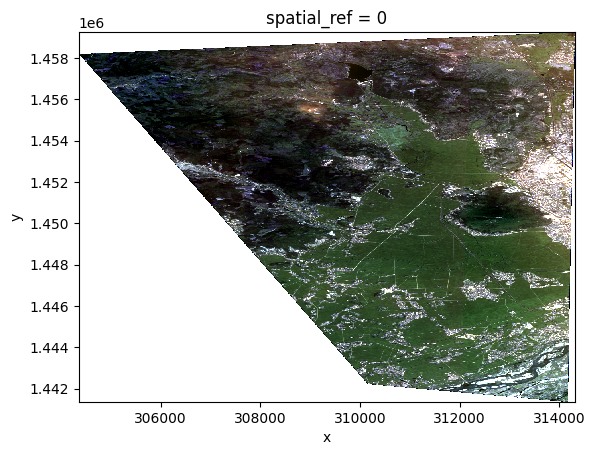

In [7]:
xr.plot.imshow(opt_stack.copy(data=display.scale(opt_stack.data)))

In [8]:
opt_stack

<xarray.DataArray 'BLUE_GREEN_RED' (z: 3, y: 2237, x: 1244)>
array([[[       nan,        nan,        nan, ..., 0.02729181,
         0.03021449, 0.0321508 ],
        [       nan,        nan,        nan, ..., 0.03289769,
         0.03252383, 0.03231718],
        [       nan,        nan,        nan, ..., 0.03253607,
         0.03250813, 0.03260763],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ..., 0.0325688 ,
         0.03575394, 0.03786882],
        [       nan,        nan,        nan, ..., 0.03874811,
         0.0377332 , 0.0372853 ],
        [       nan,        nan,        nan, ..., 0.03795209,
         0.03785328, 0.03810363],
...
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ..., 0.02202989,
         0.02403895, 0.02508134],
        [       nan,        nan,        nan, ..., 0.02564428,
         0.02424301, 0.02346394],
        [       nan,        nan,        nan, ..., 0.0244639 ,
         0.02421321, 0.02448287],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]], dtype=float32)
Coordinates:
  * x            (x) float64 3.044e+05 3.044e+05 ... 3.143e+05 3.143e+05
  * y            (y) float64 1.459e+06 1.459e+06 ... 1.441e+06 1.441e+06
    spatial_ref  int64 0
  * z            (z) object MultiIndex
  * variable     (z) object 'BLUE' 'GREEN' 'RED'
  * band         (z) int64 1 1 1
Attributes:
    long_name:         BLUE GREEN RED
    constellation:     CUSTOM
    constellation_id:  CUSTOM
    product_path:      /home/data/DS3/CI/eoreader/others/20200310T030415_WV02...
    product_name:      20200310T030415_WV02_Ortho_BGRN_STK
    product_filename:  20200310T030415_WV02_Ortho_BGRN_STK
    instrument:        CUSTOM
    product_type:      CUSTOM
    acquisition_date:  20221010T141944
    condensed_name:    20221010T141943_CUSTOM_CUSTOM
    orbit_direction:   None

In [9]:
# SAR minimum example
sar_prod = reader.open(sar_path,
                       custom=True,
                       sensor_type=SensorType.SAR,  # With the Enum
                       band_map={VV: 1, VV_DSPK: 2})
sar_prod

eoreader.CustomProduct '20210827T162210_ICEYE_SC_GRD_STK'
Attributes:
	condensed_name: 20221010T141945_CUSTOM_CUSTOM
	path: /home/data/DS3/CI/eoreader/others/20210827T162210_ICEYE_SC_GRD_STK.tif
	constellation: CUSTOM
	sensor type: SAR
	product type: CUSTOM
	default resolution: 47.995955510616774
	acquisition datetime: 2022-10-10T14:19:45.926447
	band mapping:
		VV: 1
		VV_DSPK: 2
	needs extraction: False

In [10]:
sar_stack = sar_prod.stack([SLOPE, VV, VV_DSPK])

2022-10-10 14:19:45,934 - [DEBUG] - Loading bands ['VV_DSPK', 'VV']


2022-10-10 14:19:47,061 - [DEBUG] - Warping DEM for 20221010T141945_CUSTOM_CUSTOM


2022-10-10 14:19:47,064 - [DEBUG] - Using DEM: /home/data/DS2/BASES_DE_DONNEES/GLOBAL/COPDEM_30m/COPDEM_30m.vrt


2022-10-10 14:19:51,042 - [DEBUG] - Computing slope for 20221010T141945_CUSTOM_CUSTOM


2022-10-10 14:19:51,398 - [DEBUG] - Stacking


2022-10-10 14:19:51,437 - [DEBUG] - Saving stack


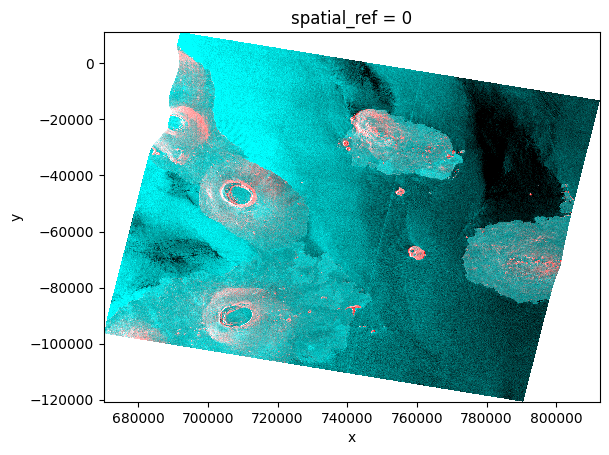

In [11]:
xr.plot.imshow(sar_stack.copy(data=display.scale(sar_stack.data)))

In [12]:
sar_stack

<xarray.DataArray 'SLOPE_VV_VV_DSPK' (z: 3, y: 2748, x: 2967)>
array([[[1.1417845 , 0.9661645 , 0.88848215, ..., 0.        ,
         0.        , 0.        ],
        [0.91908467, 0.8988768 , 0.9166924 , ..., 0.        ,
         0.        , 0.        ],
        [1.0019214 , 0.84933126, 0.86957526, ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]], dtype=float32)
Coordinates:
  * x            (x) float64 6.7e+05 6.701e+05 6.701e+05 ... 8.124e+05 8.124e+05
  * y            (y) float64 1.113e+04 1.109e+04 ... -1.206e+05 -1.207e+05
    spatial_ref  int64 0
  * z            (z) object MultiIndex
  * variable     (z) object 'SLOPE' 'VV' 'VV_DSPK'
  * band         (z) int64 1 1 1
Attributes:
    long_name:         SLOPE VV VV_DSPK
    constellation:     CUSTOM
    constellation_id:  CUSTOM
    product_path:      /home/data/DS3/CI/eoreader/others/20210827T162210_ICEY...
    product_name:      20210827T162210_ICEYE_SC_GRD_STK
    product_filename:  20210827T162210_ICEYE_SC_GRD_STK
    instrument:        CUSTOM
    product_type:      CUSTOM
    acquisition_date:  20221010T141951
    condensed_name:    20221010T141945_CUSTOM_CUSTOM
    orbit_direction:   None

<AxesSubplot: >

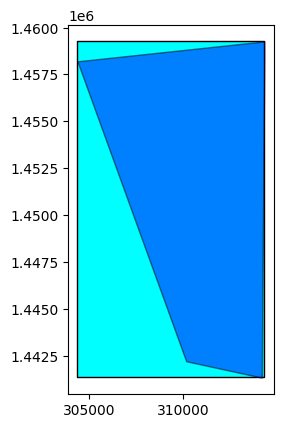

In [13]:
# You can compute the footprint and the extent
extent = opt_prod.extent()
footprint = opt_prod.footprint()
base = extent.plot(color='cyan', edgecolor='black')
footprint.plot(ax=base, color='blue', edgecolor='black', alpha=0.5)

<AxesSubplot: >

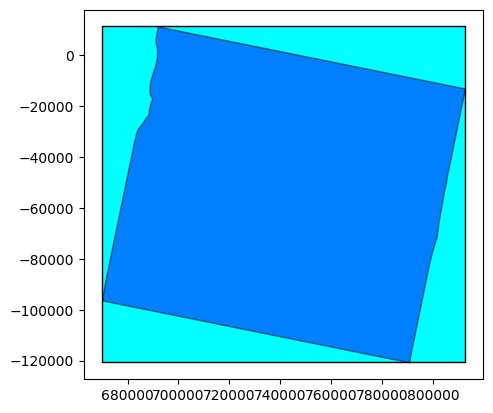

In [14]:
extent = sar_prod.extent()
footprint = sar_prod.footprint()
base = extent.plot(color='cyan', edgecolor='black')
footprint.plot(ax=base, color='blue', edgecolor='black', alpha=0.5)

In [15]:
# Optical
opt_prod = reader.open(
    opt_path,
    custom=True,
    name="20200310T030415_WV02_Ortho",
    acquisition_datetime="20200310T030415",
    sensor_type=SensorType.OPTICAL,
    platform="WV02",
    product_type="Ortho",
    default_resolution=2.0,
    sun_azimuth=10.0,
    sun_zenith=20.0,
    band_map={BLUE: 1, GREEN: 2, RED: 3, NIR: 4, SWIR_1: 5},
)
hillshade = opt_prod.load(HILLSHADE)[HILLSHADE]

2022-10-10 14:19:54,429 - [WARNING] - acquisition_datetime is not taken into account as it doesn't belong to the handled keys: ['name', 'sensor_type', 'datetime', 'band_map', 'constellation', 'instrument', 'resolution', 'product_type', 'sun_azimuth', 'sun_zenith', 'orbit_direction', 'cloud_cover']


2022-10-10 14:19:54,429 - [WARNING] - platform is not taken into account as it doesn't belong to the handled keys: ['name', 'sensor_type', 'datetime', 'band_map', 'constellation', 'instrument', 'resolution', 'product_type', 'sun_azimuth', 'sun_zenith', 'orbit_direction', 'cloud_cover']


2022-10-10 14:19:54,430 - [WARNING] - default_resolution is not taken into account as it doesn't belong to the handled keys: ['name', 'sensor_type', 'datetime', 'band_map', 'constellation', 'instrument', 'resolution', 'product_type', 'sun_azimuth', 'sun_zenith', 'orbit_direction', 'cloud_cover']


2022-10-10 14:19:54,446 - [DEBUG] - Warping DEM for 20221010T141954_CUSTOM_Ortho


2022-10-10 14:19:54,449 - [DEBUG] - Using DEM: /home/data/DS2/BASES_DE_DONNEES/GLOBAL/COPDEM_30m/COPDEM_30m.vrt


2022-10-10 14:19:55,091 - [DEBUG] - Computing hillshade DEM for 20200310T030415_WV02_Ortho


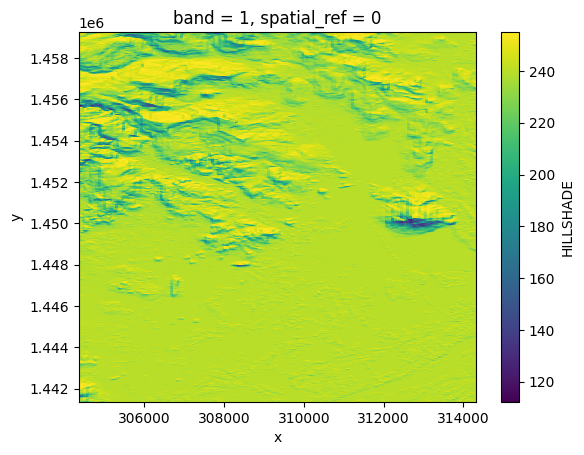

In [16]:
hillshade.plot()

In [17]:
hillshade

<xarray.DataArray 'HILLSHADE' (band: 1, y: 2237, x: 1244)>
array([[[243.51416, 244.15453, 244.76277, ..., 239.27824, 239.38185,
         239.48503],
        [241.75093, 242.62413, 243.46097, ..., 239.40317, 239.44379,
         239.4857 ],
        [239.75554, 240.88219, 241.96497, ..., 239.65657, 239.58911,
         239.52312],
        ...,
        [247.7831 , 248.34468, 246.92708, ..., 239.21782, 239.3189 ,
         239.45247],
        [247.96744, 248.52899, 246.81934, ..., 239.25084, 239.37402,
         239.52858],
        [248.12334, 248.68503, 246.69528, ..., 239.22287, 239.34776,
         239.5023 ]]], dtype=float32)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 3.044e+05 3.044e+05 ... 3.143e+05 3.143e+05
  * y            (y) float64 1.459e+06 1.459e+06 ... 1.441e+06 1.441e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:     Area
    scale_factor:      1.0
    add_offset:        0.0
    long_name:         HILLSHADE
    constellation:     CUSTOM
    constellation_id:  CUSTOM
    product_path:      /home/data/DS3/CI/eoreader/others/20200310T030415_WV02...
    product_name:      20200310T030415_WV02_Ortho
    product_filename:  20200310T030415_WV02_Ortho_BGRN_STK
    instrument:        CUSTOM
    product_type:      Ortho
    acquisition_date:  20221010T141955
    condensed_name:    20221010T141954_CUSTOM_Ortho
    orbit_direction:   None

In [18]:
# SAR
sar_prod = reader.open(
    sar_path,
    custom=True,
    sensor_type=SensorType.SAR,
    name="20210827T162210_ICEYE_SC_GRD",
    acquisition_datetime="20210827T162210",
    platform="ICEYE",
    product_type="GRD",
    default_resolution=6.0,
    band_map={VV: 1, VV_DSPK: 2},
)

2022-10-10 14:19:57,033 - [WARNING] - acquisition_datetime is not taken into account as it doesn't belong to the handled keys: ['name', 'sensor_type', 'datetime', 'band_map', 'constellation', 'instrument', 'resolution', 'product_type', 'sun_azimuth', 'sun_zenith', 'orbit_direction', 'cloud_cover']


2022-10-10 14:19:57,034 - [WARNING] - platform is not taken into account as it doesn't belong to the handled keys: ['name', 'sensor_type', 'datetime', 'band_map', 'constellation', 'instrument', 'resolution', 'product_type', 'sun_azimuth', 'sun_zenith', 'orbit_direction', 'cloud_cover']


2022-10-10 14:19:57,035 - [WARNING] - default_resolution is not taken into account as it doesn't belong to the handled keys: ['name', 'sensor_type', 'datetime', 'band_map', 'constellation', 'instrument', 'resolution', 'product_type', 'sun_azimuth', 'sun_zenith', 'orbit_direction', 'cloud_cover']


In [19]:
from pprint import pprint
from eoreader import utils

# Read and display metadata
mtd, _ = sar_prod.read_mtd()
pprint(utils.quick_xml_to_dict(mtd))

('custom_metadata',
 {'band_map': "{'VV': 1, 'VV_DSPK': 2}",
  'cloud_cover': 'None',
  'constellation': 'CUSTOM',
  'datetime': '2022-10-10T14:19:57.035801',
  'instrument': 'CUSTOM',
  'name': '20210827T162210_ICEYE_SC_GRD',
  'orbit_direction': 'None',
  'product_type': 'GRD',
  'resolution': '47.995955510616774',
  'sensor_type': 'SAR',
  'sun_azimuth': 'None',
  'sun_zenith': 'None'})
